In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.core import Dense
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

In [6]:
# Create ramdom value
np.random.seed(7)

In [7]:
print('tensorflow version: ', tf.__version__)
print('keras version: ', keras.__version__)

tensorflow version:  2.6.0
keras version:  2.6.0


In [10]:
# data1.txt 파일의 상위 36 lines skip
raw_data = np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/data/data1.txt', skip_header=36)
print(raw_data)

[[  1.   1.  84.  46. 354.]
 [  2.   1.  73.  20. 190.]
 [  3.   1.  65.  52. 405.]
 [  4.   1.  70.  30. 263.]
 [  5.   1.  76.  57. 451.]
 [  6.   1.  69.  25. 302.]
 [  7.   1.  63.  28. 288.]
 [  8.   1.  72.  36. 385.]
 [  9.   1.  79.  57. 402.]
 [ 10.   1.  75.  44. 365.]
 [ 11.   1.  27.  24. 209.]
 [ 12.   1.  89.  31. 290.]
 [ 13.   1.  65.  52. 346.]
 [ 14.   1.  57.  23. 254.]
 [ 15.   1.  59.  60. 395.]
 [ 16.   1.  69.  48. 434.]
 [ 17.   1.  60.  34. 220.]
 [ 18.   1.  79.  51. 374.]
 [ 19.   1.  75.  50. 308.]
 [ 20.   1.  82.  34. 220.]
 [ 21.   1.  59.  46. 311.]
 [ 22.   1.  67.  23. 181.]
 [ 23.   1.  85.  37. 274.]
 [ 24.   1.  55.  40. 303.]
 [ 25.   1.  63.  30. 244.]]


In [11]:
 import matplotlib.pyplot as plt
 from mpl_toolkits.mplot3d import Axes3D
 %matplotlib inline

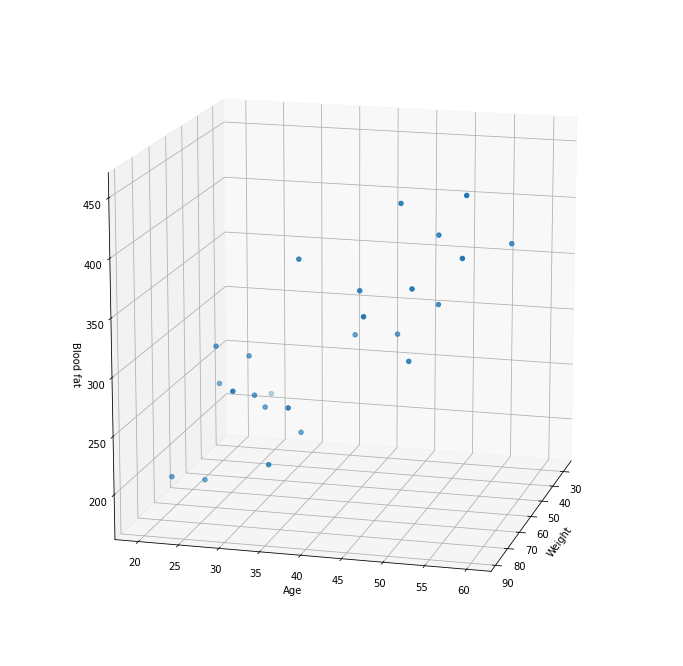

In [12]:
# 입력데이터를 잘라 넣기
xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

# 입력 데이터를 그래프로 표현  
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)

plt.show()

In [18]:
# Data pre-precessing
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data = y_data.reshape((25,1))

# Data exploration
# lr : Learn rate, 학습률
rmsprop = RMSprop(lr=0.01)
model = Sequential()
model.add(Dense(1,input_shape=(2,)))
model.compile(loss='mse',optimizer=rmsprop)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 266ms/step - loss: 144055.4062
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 141439.5938
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 139565.5000
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 138010.2344
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 136639.8125
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 135392.1562
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 134232.6719
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 133139.8750
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 132099.4219
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 131101.1250
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 130137.5703
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss:

In [17]:
print(hist.history.keys())

dict_keys(['loss'])


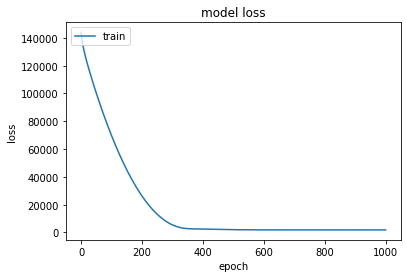

In [20]:
#loss 그래프를 그려 봅시다.
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Not learned data
# let's go predict
print("95Kg 45세 blood fat=",model.predict(np.array([95, 45]).reshape(1,2)))
print("65Kg 28세 blood fat=",model.predict(np.array([65, 28]).reshape(1,2)))

95Kg 45세 blood fat= [[373.6722]]
65Kg 28세 blood fat= [[243.13553]]


In [24]:
W_, b_ = model.get_weights()

x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

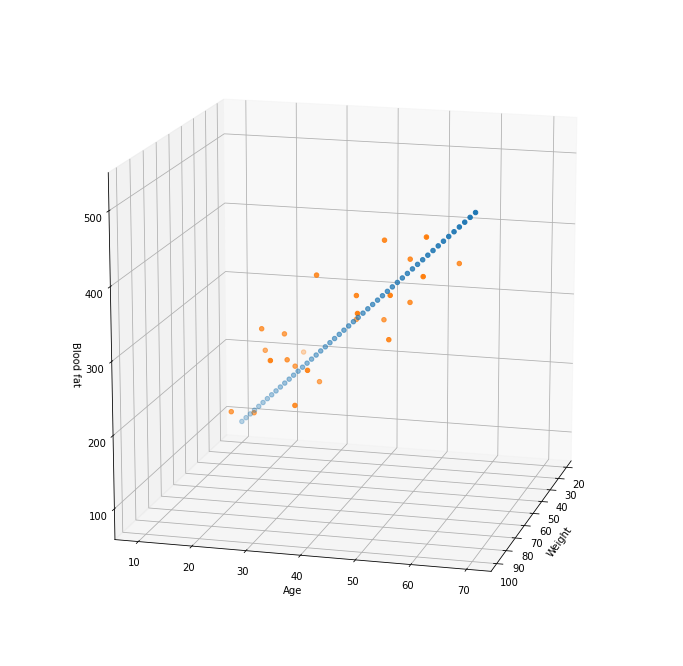

In [25]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, Z)
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)

plt.show()